# PDF Extraction and Picture Description
This notebook is used to extract the images and metadata from a PDF file and describe the images.

## PDF Extraction using LM Studio

In [12]:
import logging
from pathlib import Path
import json

# --- Docling Imports ---
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import VlmPipelineOptions
from docling.document_converter import DocumentConverter, PdfFormatOption
from docling.pipeline.vlm_pipeline import VlmPipeline

# -------------------[ Configuration ]-------------------
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# --- Main PDF Conversion Function ---
def convert_pdf_with_lmstudio(pdf_path_str: str, output_dir_str: str = "output_lmstudio_conversion"):
    """
    Uses a model served by LM Studio to perform a full conversion of a PDF document,
    then saves the results in JSON format only.

    Args:
        pdf_path_str (str): The path to the source PDF file.
        output_dir_str (str): The directory to save the output files.
    """
    pdf_path = Path(pdf_path_str)
    if not pdf_path.is_file():
        logging.error(f"❌ File not found: {pdf_path}")
        return

    # --- Step 1: Setup Directories ---
    output_dir = Path(output_dir_str)
    output_dir.mkdir(parents=True, exist_ok=True)
    logging.info(f"Output will be saved in: {output_dir.resolve()}")

    # --- Step 2: Configure the VLM Pipeline to use LM Studio ---
    # IMPORTANT: This model identifier must EXACTLY match the one loaded in LM Studio.
    model_identifier = "google/gemma-3-12b-it-gguf"
    
    logging.info(f"⚙️  Configuring VLM Pipeline to use '{model_identifier}' on LM Studio...")

    # Define the connection and model parameters for the LM Studio API
    pipeline_options = VlmPipelineOptions(
        url="http://localhost:1234/v1/chat/completions",
        model=model_identifier,
        prompt="Parse the document.",
        params={"max_tokens": 16384},
        generate_page_images=True  # This is essential
    )

    # --- Step 3: Initialize the Document Converter ---
    converter = DocumentConverter(
        format_options={
            InputFormat.PDF: PdfFormatOption(
                pipeline_cls=VlmPipeline,
                pipeline_options=pipeline_options,
            ),
        },
    )

    # --- Step 4: Run the Conversion ---
    logging.info(f"🚀 Starting PDF conversion for: {pdf_path.name}")
    try:
        result = converter.convert(pdf_path)
        document = result.document
        logging.info("✅ PDF conversion complete.")
    except Exception as e:
        logging.error(f"A critical error occurred during conversion. Is the LM Studio server running with model '{model_identifier}' loaded?", exc_info=True)
        return

    # --- Step 5: Save JSON Output ---
    logging.info(f"💾 Saving JSON output to '{output_dir.name}' directory...")
    
    # Define a base filename for the output files
    fname_base = f"{pdf_path.stem}-{model_identifier.replace('/', '_')}"

    # Save as a structured JSON file
    json_path = output_dir / f"{fname_base}.json"
    document.save_as_json(json_path)
    logging.info(f"   => Saved JSON: {json_path.name}")
    
    logging.info("🎉 JSON file generated successfully!")

# -------------------[ Script Execution ]-------------------
if __name__ == "__main__":
    # Define the source PDF file to be processed
    PDF_SOURCE = r"C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\Sample Papers\1-s2.0-S1385110124000054-main.pdf"
    
    # Run the main conversion function
    convert_pdf_with_lmstudio(PDF_SOURCE)

2025-07-14 21:01:53,600 - INFO - Output will be saved in: C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\output_lmstudio_conversion
2025-07-14 21:01:53,600 - INFO - ⚙️  Configuring VLM Pipeline to use 'google/gemma-3-12b-it-gguf' on LM Studio...
2025-07-14 21:01:53,603 - INFO - 🚀 Starting PDF conversion for: 1-s2.0-S1385110124000054-main.pdf
2025-07-14 21:01:53,604 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-07-14 21:01:53,618 - INFO - Going to convert document batch...
2025-07-14 21:01:53,619 - INFO - Initializing pipeline for VlmPipeline with options hash 75529f57132c23f83dea4e9a249e41d3
2025-07-14 21:01:53,678 - INFO - Accelerator device: 'cuda:0'
2025-07-14 21:01:55,735 - INFO - Processing document 1-s2.0-S1385110124000054-main.pdf
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you en

## Picture Extraction and Description

2025-07-28 23:28:16,464 - INFO - --- Phase 1: Starting Image Extraction from processed_20250728_225735.json ---
2025-07-28 23:28:16,480 - INFO - Found 8 pictures. Saving them to temp_extraction_folder\images...
2025-07-28 23:28:16,481 - INFO -    ✅ Saved image 1: picture_1.png
2025-07-28 23:28:16,482 - INFO -    ✅ Saved image 2: picture_2.png
2025-07-28 23:28:16,483 - INFO -    ✅ Saved image 3: picture_3.png
2025-07-28 23:28:16,484 - INFO -    ✅ Saved image 4: picture_4.png
2025-07-28 23:28:16,484 - INFO -    ✅ Saved image 5: picture_5.png
2025-07-28 23:28:16,485 - INFO -    ✅ Saved image 6: picture_6.png
2025-07-28 23:28:16,486 - INFO -    ✅ Saved image 7: picture_7.png
2025-07-28 23:28:16,487 - INFO -    ✅ Saved image 8: picture_8.png
2025-07-28 23:28:16,489 - INFO - ✅ Phase 1 Complete. Metadata for 8 images saved to temp_extraction_folder\metadata.json
2025-07-28 23:28:16,490 - INFO - --- Phase 2: Starting Image Analysis via LM Studio ---
2025-07-28 23:28:16,495 - INFO -    Analyzin


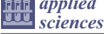

2025-07-28 23:28:22,588 - INFO -    Analyzing picture_2.png...



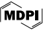

2025-07-28 23:28:32,177 - INFO -    Analyzing picture_3.png...


2025-07-28 23:28:37,032 - INFO -    Analyzing picture_4.png...



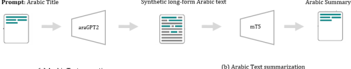

2025-07-28 23:28:46,800 - INFO -    Analyzing picture_5.png...



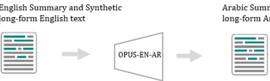

2025-07-28 23:28:51,072 - INFO -    Analyzing picture_6.png...



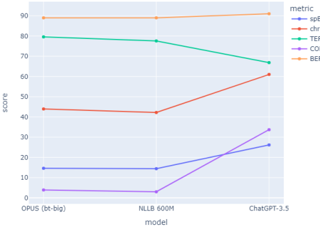

2025-07-28 23:28:57,184 - INFO -    Analyzing picture_7.png...



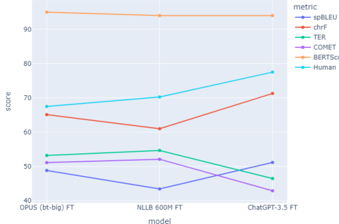

2025-07-28 23:29:03,345 - INFO -    Analyzing picture_8.png...



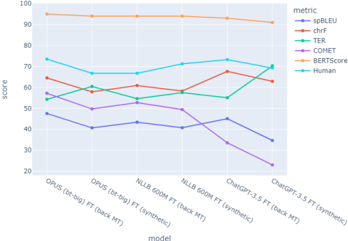

2025-07-28 23:29:10,217 - INFO - ✅ Phase 2 Complete. All images processed and displayed.
2025-07-28 23:29:10,218 - INFO - --- Phase 3: Cleaning up temporary directory: temp_extraction_folder ---
2025-07-28 23:29:10,222 - ERROR - Error removing directory temp_extraction_folder: [WinError 5] 拒绝访问。: 'temp_extraction_folder\\images'


In [1]:
import logging
from pathlib import Path
import json
import base64
import requests
import shutil
import re

# --- Imports for Displaying Results in Jupyter ---
from IPython.display import display, HTML

# -------------------[ Configuration ]-------------------
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# --- Phase 1: Extract Images from JSON File ---

def extract_images_from_json(json_path_str: str, output_dir_str: str = "temp_extraction"):
    """
    Extracts all images from a Docling-generated JSON file and saves them to a temporary folder.
    
    Args:
        json_path_str (str): The path to the source JSON file.
        output_dir_str (str): The name of the temporary directory for extracted files.
        
    Returns:
        Path object to the generated metadata JSON file, or None if it fails.
    """
    json_path = Path(json_path_str)
    if not json_path.is_file():
        logging.error(f"❌ JSON file not found: {json_path}")
        return None
        
    output_dir = Path(output_dir_str)
    images_dir = output_dir / "images"
    images_dir.mkdir(parents=True, exist_ok=True)
    
    logging.info(f"--- Phase 1: Starting Image Extraction from {json_path.name} ---")
    
    # Load the JSON data
    try:
        with open(json_path, "r", encoding="utf-8") as f:
            data = json.load(f)
    except json.JSONDecodeError as e:
        logging.error(f"Failed to parse JSON file: {e}")
        return None
    except Exception as e:
        logging.error(f"Failed to read JSON file: {e}")
        return None

    # Navigate to the pictures list
    pictures = data.get("pictures")
    if not pictures:
        logging.warning("⚠️ No 'pictures' key found in the JSON file, or the list is empty.")
        return None

    logging.info(f"Found {len(pictures)} pictures. Saving them to {images_dir}...")
    
    extracted_metadata = []
    saved_count = 0
    
    for i, pic_data in enumerate(pictures):
        # Extract image data from the URI
        image_uri = pic_data.get("image", {}).get("uri")
        
        if not image_uri or not image_uri.startswith("data:image"):
            logging.warning(f"Skipping picture #{i+1} - no valid image data URI found.")
            continue
            
        try:
            # Parse the data URI to extract the base64 data
            # Format: data:image/png;base64,<base64_data>
            match = re.match(r'data:image/([^;]+);base64,(.+)', image_uri)
            if not match:
                logging.warning(f"Skipping picture #{i+1} - invalid data URI format.")
                continue
                
            image_format = match.group(1)
            base64_data = match.group(2)
            
            # Decode the base64 data
            image_data = base64.b64decode(base64_data)
            
            # Save the image
            image_filename = f"picture_{saved_count+1}.png"
            image_save_path = images_dir / image_filename
            
            with open(image_save_path, "wb") as fp:
                fp.write(image_data)
            
            # Extract caption if available
            caption = "No caption found."
            if "captions" in pic_data and pic_data["captions"]:
                caption = pic_data["captions"][0].get("text", "No caption found.")
            
            # Store information for the next phase
            extracted_metadata.append({
                "id": pic_data.get('self_ref', f'picture_{saved_count+1}'),
                "image_path": str(image_save_path),
                "caption": caption
            })
            
            saved_count += 1
            logging.info(f"   ✅ Saved image {saved_count}: {image_filename}")
            
        except Exception as e:
            logging.error(f"Could not save image #{i+1}: {e}")

    if saved_count == 0:
        logging.warning("⚠️ No images were successfully extracted and saved.")
        return None

    # Save metadata
    metadata_path = output_dir / "metadata.json"
    with open(metadata_path, "w", encoding="utf-8") as f:
        json.dump(extracted_metadata, f, indent=2)
        
    logging.info(f"✅ Phase 1 Complete. Metadata for {saved_count} images saved to {metadata_path}")
    return metadata_path

# --- Phase 2: Image Analysis via LM Studio and Display ---

def analyze_and_display_images(metadata_path_str: str):
    """
    Analyzes extracted images using an LM Studio server and displays the results.
    
    Args:
        metadata_path_str (str): Path to the metadata.json file from Phase 1.
    """
    metadata_path = Path(metadata_path_str)
    if not metadata_path.is_file():
        logging.error(f"❌ Metadata file not found: {metadata_path}")
        return

    logging.info(f"--- Phase 2: Starting Image Analysis via LM Studio ---")
    
    with open(metadata_path, "r", encoding="utf-8") as f:
        images_to_process = json.load(f)

    # LM Studio server configuration
    lm_studio_url = "http://localhost:1234/v1/chat/completions"
    # IMPORTANT: Verify this model identifier matches the one loaded in your LM Studio
    model_name = "google/gemma-3-12b-it-gguf" 
    
    for item in images_to_process:
        image_path = Path(item["image_path"])
        logging.info(f"   Analyzing {image_path.name}...")

        # Encode image to Base64 to send in the API request
        try:
            with open(image_path, "rb") as img_file:
                base64_image = base64.b64encode(img_file.read()).decode('utf-8')
        except Exception as e:
            logging.error(f"Could not read or encode image {image_path}: {e}")
            continue

        # Prepare the request payload for LM Studio's OpenAI-compatible endpoint
        payload = {
            "model": model_name,
            "messages": [
                {
                    "role": "user",
                    "content": [
                        {
                            "type": "text",
                            "text": (
                                "You are an expert scientific analyst. Your task is to analyze the provided image.\n\n"
                                "First, determine if the image is a meaningful scientific figure (like a graph, chart, diagram, or photo of an experiment) "
                                "OR if it is a non-informative element (like a publisher's logo, a journal's watermark, or a simple decorative icon).\n\n"
                                "- If the image IS a meaningful scientific figure, describe it in a detailed paragraph.\n"
                                "- If the image is a NON-INFORMATIVE element, you MUST respond with only the exact string: N/A"
                            )
                        },
                        {
                            "type": "image_url",
                            "image_url": {"url": f"data:image/png;base64,{base64_image}"}
                        }
                    ]
                }
            ],
            "max_tokens": 300
        }
        
        # Send the request and get the AI description
        try:
            response = requests.post(lm_studio_url, json=payload, timeout=240)
            response.raise_for_status()
            ai_description = response.json()["choices"][0]["message"]["content"]
        except requests.exceptions.RequestException as e:
            logging.error(f"Failed to connect to LM Studio for {image_path.name}. Is the server running? Error: {e}")
            ai_description = "N/A - Could not get description from LM Studio."
        
        # Build and display the HTML for this item
        html_item = (
            f'<div style="border: 1px solid #ddd; padding: 15px; margin-bottom: 20px; border-radius: 5px;">'
            f"<h3>Picture Analysis: <code>{item['id']}</code></h3>"
            f'<img src="data:image/png;base64,{base64_image}" style="max-width: 600px; height: auto; border: 1px solid #ccc;" /><br />'
            f"<h4>Original Caption</h4><p><i>{item['caption']}</i></p>"
            f"<h4>LM Studio Model Annotation</h4>"
            f"<blockquote style='border-left: 3px solid #ccc; padding-left: 15px; margin: 10px;'>"
            f"{ai_description.replace('\n', '<br>')}"
            f"</blockquote></div>"
        )
        display(HTML(html_item)) # Display results incrementally as they are generated

    logging.info("✅ Phase 2 Complete. All images processed and displayed.")

# --- Phase 3: Cleanup ---
def cleanup(temp_dir_str: str = "temp_extraction"):
    """Removes the temporary directory and all its contents."""
    temp_dir = Path(temp_dir_str)
    if temp_dir.exists():
        logging.info(f"--- Phase 3: Cleaning up temporary directory: {temp_dir} ---")
        try:
            shutil.rmtree(temp_dir)
            logging.info("✅ Cleanup successful.")
        except OSError as e:
            logging.error(f"Error removing directory {temp_dir}: {e}")

# -------------------[ Main Execution Block ]-------------------
if __name__ == '__main__':
    # Define the source JSON file and the temporary directory name
    #JSON_SOURCE = r"C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\output_lmstudio_conversion\1-s2.0-S1385110124000054-main-google_gemma-3-12b-it-gguf.json"
    JSON_SOURCE = r"C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\PDF_Analyzer_App\output\processed_20250728_225735.json"
    TEMP_FOLDER = "temp_extraction_folder"
    
    # Run Phase 1: Extract images from JSON and create metadata
    metadata_file = extract_images_from_json(JSON_SOURCE, TEMP_FOLDER)
    
    # Run Phase 2: Analyze images and display results, if Phase 1 was successful
    if metadata_file:
        analyze_and_display_images(metadata_file)
        # Run Phase 3: Clean up the temporary files
        cleanup(TEMP_FOLDER)
    else:
        logging.error("Pipeline stopped because image extraction failed.")

2025-07-21 20:48:01,959 - INFO - --- Phase 1: Starting Image Extraction from 1-s2.0-S1385110124000054-main-google_gemma-3-12b-it-gguf.json ---
2025-07-21 20:48:01,972 - INFO - Found 15 pictures. Saving them to temp_extraction_folder\images...
2025-07-21 20:48:01,973 - INFO -    ✅ Saved image 1: picture_1.png
2025-07-21 20:48:01,974 - INFO -    ✅ Saved image 2: picture_2.png
2025-07-21 20:48:01,974 - INFO -    ✅ Saved image 3: picture_3.png
2025-07-21 20:48:01,975 - INFO -    ✅ Saved image 4: picture_4.png
2025-07-21 20:48:01,976 - INFO -    ✅ Saved image 5: picture_5.png
2025-07-21 20:48:01,977 - INFO -    ✅ Saved image 6: picture_6.png
2025-07-21 20:48:01,978 - INFO -    ✅ Saved image 7: picture_7.png
2025-07-21 20:48:01,979 - INFO -    ✅ Saved image 8: picture_8.png
2025-07-21 20:48:01,980 - INFO -    ✅ Saved image 9: picture_9.png
2025-07-21 20:48:01,980 - INFO -    ✅ Saved image 10: picture_10.png
2025-07-21 20:48:01,981 - INFO -    ✅ Saved image 11: picture_11.png
2025-07-21 20:48


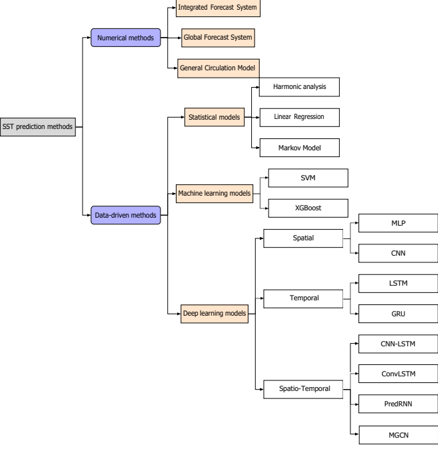

2025-07-21 20:48:17,298 - INFO -    Analyzing picture_5.png...
2025-07-21 20:48:22,884 - INFO -    🔍 Performing DDGS search and LM Studio summarization...
C:\Users\Hongyu\AppData\Local\Temp\ipykernel_11828\624955206.py:143: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  ddgs = DDGS()
2025-07-21 20:48:22,947 - INFO - response: https://www.bing.com/search?q=BiLSTM+Time+Series+Forecasting 200
2025-07-21 20:48:23,023 - INFO -    ✅ Found 5 search results for 'BiLSTM Time Series Forecasting'
2025-07-21 20:48:27,645 - INFO -    ✅ Generated AI summary using LM Studio



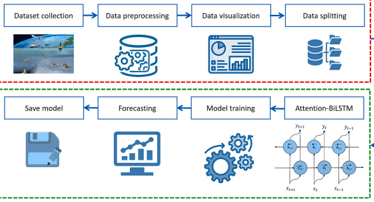

2025-07-21 20:48:29,646 - INFO -    Analyzing picture_6.png...
2025-07-21 20:48:33,851 - INFO -    🔍 Performing DDGS search and LM Studio summarization...
C:\Users\Hongyu\AppData\Local\Temp\ipykernel_11828\624955206.py:143: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  ddgs = DDGS()
2025-07-21 20:48:33,917 - INFO - response: https://www.bing.com/search?q=Morocco+geography+Tropic+of+Cancer 200
2025-07-21 20:48:33,989 - INFO -    ✅ Found 5 search results for 'Morocco geography Tropic of Cancer'
2025-07-21 20:48:38,029 - INFO -    ✅ Generated AI summary using LM Studio



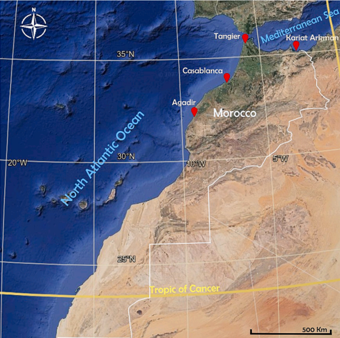

2025-07-21 20:48:40,034 - INFO -    Analyzing picture_7.png...



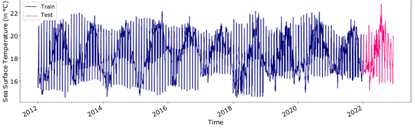

2025-07-21 20:48:45,501 - INFO -    Analyzing picture_8.png...



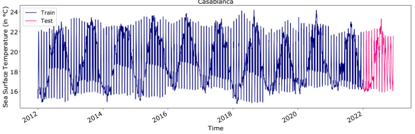

2025-07-21 20:48:50,420 - INFO -    Analyzing picture_9.png...



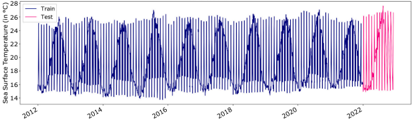

2025-07-21 20:48:55,428 - INFO -    Analyzing picture_10.png...



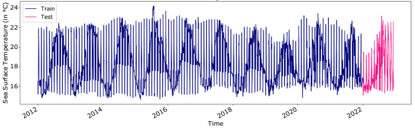

2025-07-21 20:49:00,695 - INFO -    Analyzing picture_11.png...
2025-07-21 20:49:05,619 - INFO -    🔍 Performing DDGS search and LM Studio summarization...
C:\Users\Hongyu\AppData\Local\Temp\ipykernel_11828\624955206.py:143: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  ddgs = DDGS()
2025-07-21 20:49:05,678 - INFO - response: https://www.bing.com/search?q=bidirectional+RNN+recurrent+neural+networks 200
2025-07-21 20:49:05,751 - INFO -    ✅ Found 5 search results for 'bidirectional RNN recurrent neural networks'
2025-07-21 20:49:09,473 - INFO -    ✅ Generated AI summary using LM Studio



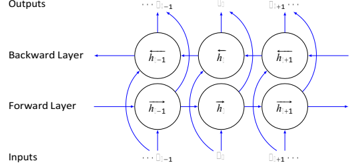

2025-07-21 20:49:11,475 - INFO -    Analyzing picture_12.png...



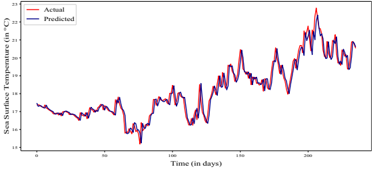

2025-07-21 20:49:16,682 - INFO -    Analyzing picture_13.png...



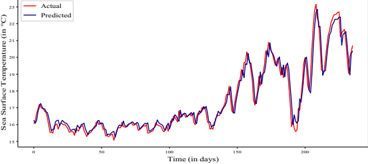

2025-07-21 20:49:21,813 - INFO -    Analyzing picture_14.png...



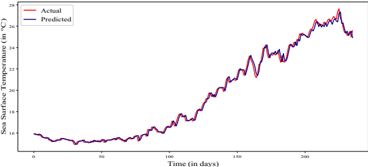

2025-07-21 20:49:26,939 - INFO -    Analyzing picture_15.png...



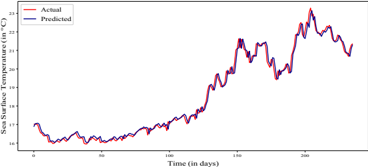

2025-07-21 20:49:32,084 - INFO - ✅ Phase 2 Complete. All images processed with LM Studio-powered analysis and search summary.
2025-07-21 20:49:32,085 - INFO - --- Phase 3: Cleaning up temporary directory: temp_extraction_folder ---
2025-07-21 20:49:32,088 - ERROR - Error removing directory temp_extraction_folder: [WinError 5] 拒绝访问。: 'temp_extraction_folder\\images'


In [17]:
import logging
from pathlib import Path
import json
import base64
import requests
import shutil
import re
import time
from duckduckgo_search import DDGS

# --- Imports for Displaying Results in Jupyter ---
from IPython.display import display, HTML

# -------------------[ Configuration ]-------------------
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# --- Phase 1: Extract Images from JSON File ---

def extract_images_from_json(json_path_str: str, output_dir_str: str = "temp_extraction"):
    """
    Extracts all images from a Docling-generated JSON file and saves them to a temporary folder.
    
    Args:
        json_path_str (str): The path to the source JSON file.
        output_dir_str (str): The name of the temporary directory for extracted files.
        
    Returns:
        Path object to the generated metadata JSON file, or None if it fails.
    """
    json_path = Path(json_path_str)
    if not json_path.is_file():
        logging.error(f"❌ JSON file not found: {json_path}")
        return None
        
    output_dir = Path(output_dir_str)
    images_dir = output_dir / "images"
    images_dir.mkdir(parents=True, exist_ok=True)
    
    logging.info(f"--- Phase 1: Starting Image Extraction from {json_path.name} ---")
    
    # Load the JSON data
    try:
        with open(json_path, "r", encoding="utf-8") as f:
            data = json.load(f)
    except json.JSONDecodeError as e:
        logging.error(f"Failed to parse JSON file: {e}")
        return None
    except Exception as e:
        logging.error(f"Failed to read JSON file: {e}")
        return None

    # Navigate to the pictures list
    pictures = data.get("pictures")
    if not pictures:
        logging.warning("⚠️ No 'pictures' key found in the JSON file, or the list is empty.")
        return None

    logging.info(f"Found {len(pictures)} pictures. Saving them to {images_dir}...")
    
    extracted_metadata = []
    saved_count = 0
    
    for i, pic_data in enumerate(pictures):
        # Extract image data from the URI
        image_uri = pic_data.get("image", {}).get("uri")
        
        if not image_uri or not image_uri.startswith("data:image"):
            logging.warning(f"Skipping picture #{i+1} - no valid image data URI found.")
            continue
            
        try:
            # Parse the data URI to extract the base64 data
            # Format: data:image/png;base64,<base64_data>
            match = re.match(r'data:image/([^;]+);base64,(.+)', image_uri)
            if not match:
                logging.warning(f"Skipping picture #{i+1} - invalid data URI format.")
                continue
                
            image_format = match.group(1)
            base64_data = match.group(2)
            
            # Decode the base64 data
            image_data = base64.b64decode(base64_data)
            
            # Save the image
            image_filename = f"picture_{saved_count+1}.png"
            image_save_path = images_dir / image_filename
            
            with open(image_save_path, "wb") as fp:
                fp.write(image_data)
            
            # Extract caption if available
            caption = "No caption found."
            if "captions" in pic_data and pic_data["captions"]:
                caption = pic_data["captions"][0].get("text", "No caption found.")
            
            # Store information for the next phase
            extracted_metadata.append({
                "id": pic_data.get('self_ref', f'picture_{saved_count+1}'),
                "image_path": str(image_save_path),
                "caption": caption
            })
            
            saved_count += 1
            logging.info(f"   ✅ Saved image {saved_count}: {image_filename}")
            
        except Exception as e:
            logging.error(f"Could not save image #{i+1}: {e}")

    if saved_count == 0:
        logging.warning("⚠️ No images were successfully extracted and saved.")
        return None

    # Save metadata
    metadata_path = output_dir / "metadata.json"
    with open(metadata_path, "w", encoding="utf-8") as f:
        json.dump(extracted_metadata, f, indent=2)
        
    logging.info(f"✅ Phase 1 Complete. Metadata for {saved_count} images saved to {metadata_path}")
    return metadata_path

# --- Web Search Using DDGS ---

def search_web_with_ddgs(query: str, max_results: int = 5):
    """
    Perform web search using duckduckgo-search package.
    
    Args:
        query (str): Search query
        max_results (int): Maximum number of results to return
        
    Returns:
        dict: Search results with sources
    """
    search_results = {
        'query': query,
        'sources': [],
        'error': None
    }
    
    try:
        # Initialize DDGS
        ddgs = DDGS()
        
        # Perform text search
        results = ddgs.text(query, max_results=max_results)
        
        for result in results:
            search_results['sources'].append({
                'title': result.get('title', ''),
                'body': result.get('body', ''),
                'href': result.get('href', ''),
                'source': 'DuckDuckGo Search'
            })
        
        logging.info(f"   ✅ Found {len(search_results['sources'])} search results for '{query}'")
        
    except Exception as e:
        search_results['error'] = str(e)
        logging.error(f"DDGS search failed for '{query}': {e}")
    
    return search_results

# --- AI Summary Using LM Studio ---

def summarize_with_lm_studio(search_results: dict, original_query: str, image_description: str, lm_studio_url: str, model_name: str):
    """
    Use LM Studio to summarize search results with image context.
    
    Args:
        search_results (dict): Search results from DDGS
        original_query (str): Original search query
        image_description (str): Detailed description of the image
        lm_studio_url (str): LM Studio API URL
        model_name (str): Model name
        
    Returns:
        str: AI-generated summary
    """
    if not search_results.get('sources'):
        return "No search results available for summarization."
    
    try:
        # Compile search results
        sources_text = ""
        for i, source in enumerate(search_results['sources'], 1):
            title = source.get('title', f'Source {i}')
            body = source.get('body', '')
            href = source.get('href', '')
            
            sources_text += f"\nSource {i} - {title}:\n{body}\n"
            if href:
                sources_text += f"URL: {href}\n"
            sources_text += "-" * 50 + "\n"
        
        # Enhanced prompt with image context
        summary_prompt = f"""You are analyzing search results related to a specific image. Here's the context:

IMAGE DESCRIPTION: {image_description}

SEARCH QUERY: "{original_query}"

SEARCH RESULTS:
{sources_text}

Instructions:
1. Focus on information from the search results that directly relates to what's shown in the image
2. Synthesize the information into ONE coherent paragraph (6-8 sentences)
3. Prioritize concepts, methods, or findings that help explain or provide context for the image content
4. If the search results contain general information, focus on the parts most relevant to the specific image
5. Connect the search findings to the visual elements described in the image

Summary:"""

        # Rest of the function remains the same...
        
        # Use LM Studio for summarization
        payload = {
            "model": model_name,
            "messages": [
                {
                    "role": "user",
                    "content": summary_prompt
                }
            ],
            "max_tokens": 500,
            "temperature": 0.3
        }
        
        response = requests.post(lm_studio_url, json=payload, timeout=120)
        response.raise_for_status()
        summary = response.json()["choices"][0]["message"]["content"]
        
        logging.info(f"   ✅ Generated AI summary using LM Studio")
        return summary.strip()
        
    except Exception as e:
        logging.error(f"LM Studio summarization failed: {e}")
        
        # Fallback: create a simple summary from search results
        if search_results.get('sources'):
            summary_parts = []
            for source in search_results['sources'][:2]:
                if source['body']:
                    summary_parts.append(source['body'][:300])
            
            if summary_parts:
                return f"Search results for '{original_query}': " + " ".join(summary_parts) + "..."
        
        return "Failed to generate summary from search results."

# --- Phase 2: Enhanced Image Analysis with LM Studio Search Summary ---

def analyze_and_display_images_with_lm_studio_search(metadata_path_str: str):
    """
    Analyzes extracted images with detailed descriptions and LM Studio-powered search summaries.
    """
    metadata_path = Path(metadata_path_str)
    if not metadata_path.is_file():
        logging.error(f"❌ Metadata file not found: {metadata_path}")
        return

    logging.info(f"--- Phase 2: Starting Enhanced Image Analysis with LM Studio Search Summary ---")
    
    with open(metadata_path, "r", encoding="utf-8") as f:
        images_to_process = json.load(f)

    # LM Studio server configuration
    lm_studio_url = "http://localhost:1234/v1/chat/completions"
    model_name = "google/gemma-3-12b-it-gguf" 
    
    for item in images_to_process:
        image_path = Path(item["image_path"])
        logging.info(f"   Analyzing {image_path.name}...")

        # Encode image to Base64
        try:
            with open(image_path, "rb") as img_file:
                base64_image = base64.b64encode(img_file.read()).decode('utf-8')
        except Exception as e:
            logging.error(f"Could not read or encode image {image_path}: {e}")
            continue

        # Enhanced prompt for detailed analysis
        enhanced_prompt = """You are an expert scientific analyst. Analyze the provided image and follow these steps:

1. First, determine if this is:
   - INFORMATIVE: A meaningful scientific element (graphs, charts, diagrams, maps, flowcharts, etc.)
   - NON-INFORMATIVE: Publisher logos, watermarks, decorative icons, etc.

2. If NON-INFORMATIVE, respond with exactly: "N/A"

3. If INFORMATIVE, classify the image type:
   - DATA_VISUALIZATION: Charts, graphs, plots with actual data points, statistical visualizations
   - CONCEPTUAL: Flowcharts, process diagrams, maps, conceptual frameworks, schematic diagrams, methodological illustrations

4. IMPORTANT: Explain in a detailed paragraph what you see in the image. For DATA_VISUALIZATION images, describe the data patterns, trends, axes, scales, and any notable findings. For CONCEPTUAL images, describe the processes, relationships, components, and methodological steps shown. Be thorough and comprehensive in your description.

5. If the image is CONCEPTUAL type, also provide 2-3 specific search keywords that would help find background information about the concepts, methods, or geographic locations shown in the image.

Format your response as:
TYPE: [DATA_VISUALIZATION/CONCEPTUAL]
DETAILED_DESCRIPTION: [Your comprehensive detailed paragraph description]
SEARCH_KEYWORDS: [keyword1, keyword2, keyword3] (only if CONCEPTUAL type)"""

        # Get AI analysis
        payload = {
            "model": model_name,
            "messages": [
                {
                    "role": "user",
                    "content": [
                        {"type": "text", "text": enhanced_prompt},
                        {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{base64_image}"}}
                    ]
                }
            ],
            "max_tokens": 600,
            "temperature": 0.1
        }
        
        try:
            response = requests.post(lm_studio_url, json=payload, timeout=300)
            response.raise_for_status()
            ai_response = response.json()["choices"][0]["message"]["content"]
        except requests.exceptions.RequestException as e:
            logging.error(f"Failed to connect to LM Studio for {image_path.name}: {e}")
            ai_response = "N/A - Could not get description from LM Studio."
        
        # Parse AI response
        if ai_response.strip() == "N/A":
            continue
            
        # Parse the structured response
        image_type = "UNKNOWN"
        detailed_description = ai_response
        search_keywords = []
        search_results = None
        ai_search_summary = None
        
        try:
            lines = ai_response.split('\n')
            for line in lines:
                if line.startswith('TYPE:'):
                    image_type = line.replace('TYPE:', '').strip()
                elif line.startswith('DETAILED_DESCRIPTION:'):
                    detailed_description = line.replace('DETAILED_DESCRIPTION:', '').strip()
                elif line.startswith('SEARCH_KEYWORDS:'):
                    keywords_text = line.replace('SEARCH_KEYWORDS:', '').strip()
                    keywords_text = keywords_text.strip('[]')
                    search_keywords = [kw.strip() for kw in keywords_text.split(',') if kw.strip()]
        except Exception as e:
            logging.warning(f"Could not parse structured response for {image_path.name}: {e}")
        
        # Perform DDGS web search for conceptual images
        if image_type == "CONCEPTUAL" and search_keywords:
            logging.info(f"   🔍 Performing DDGS search and LM Studio summarization...")
            search_query = " ".join(search_keywords[:2])
            search_results = search_web_with_ddgs(search_query)
            
            if search_results.get('sources'):
                ai_search_summary = summarize_with_lm_studio(
                search_results, search_query, detailed_description, lm_studio_url, model_name
                )
            time.sleep(2)  # Be respectful to APIs
        
        # Build HTML display with three clear sections
        html_content = f"""
        <div style="border: 1px solid #d1d5db; padding: 20px; margin-bottom: 20px; border-radius: 8px;">
            <h3 style="margin-top: 0; color: inherit;">📊 Picture Analysis: <code>{item['id']}</code></h3>
            
            <div style="margin-bottom: 20px;">
                <img src="data:image/png;base64,{base64_image}" 
                     style="max-width: 100%; height: auto; border: 1px solid #d1d5db; border-radius: 4px;" />
            </div>
            
            <div style="border-left: 3px solid #8b5cf6; padding-left: 15px; margin-bottom: 20px;">
                <h4 style="margin-top: 0; color: inherit;">📝 Original Caption</h4>
                <p style="font-style: italic; margin-bottom: 0; line-height: 1.5;">{item['caption']}</p>
            </div>
            
            <div style="border-left: 3px solid #3b82f6; padding-left: 15px; margin-bottom: 20px;">
                <h4 style="margin-top: 0; color: inherit;">🤖 Detailed AI Visual Analysis</h4>
                <div style="margin-bottom: 15px;">
                    <span style="background-color: #e5e7eb; padding: 4px 8px; border-radius: 12px; font-size: 12px; font-weight: bold;">
                        {image_type}
                    </span>
                </div>
                <div style="line-height: 1.6; text-align: justify;">
                    {detailed_description.replace('\n', '<br>')}
                </div>
            </div>
        """
        
        # Add third section for web search results if available
        if ai_search_summary and image_type == "CONCEPTUAL":
            html_content += f"""
            <div style="border-left: 3px solid #10b981; padding-left: 15px; margin-bottom: 0;">
                <h4 style="margin-top: 0; color: inherit;">🌐 Web Search Results</h4>
                <div style="margin-bottom: 10px;">
                    <strong>Search Keywords:</strong> <code>{', '.join(search_keywords)}</code>
                </div>
                <div style="margin-bottom: 10px;">
                    <strong>Query Used:</strong> <em style="color: #059669;">{search_query}</em>
                </div>
                <div style="line-height: 1.6; text-align: justify;">
                    {ai_search_summary.replace('\n', '<br>')}
                </div>
                <div style="margin-top: 10px; font-size: 12px; color: #6b7280;">
                    Sources found: {len(search_results.get('sources', []))} | Analyzed by LM Studio
                </div>
            </div>
            """
        
        html_content += '</div>'
        
        # Display the complete analysis
        display(HTML(html_content))

    logging.info("✅ Phase 2 Complete. All images processed with LM Studio-powered analysis and search summary.")

# --- Phase 3: Cleanup ---
def cleanup(temp_dir_str: str = "temp_extraction"):
    """Removes the temporary directory and all its contents."""
    temp_dir = Path(temp_dir_str)
    if temp_dir.exists():
        logging.info(f"--- Phase 3: Cleaning up temporary directory: {temp_dir} ---")
        try:
            shutil.rmtree(temp_dir)
            logging.info("✅ Cleanup successful.")
        except OSError as e:
            logging.error(f"Error removing directory {temp_dir}: {e}")

# -------------------[ Main Execution Block ]-------------------
if __name__ == '__main__':
    # Define the source JSON file and the temporary directory name
    JSON_SOURCE = r"C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\output_lmstudio_conversion\1-s2.0-S1385110124000054-main-google_gemma-3-12b-it-gguf.json"
    TEMP_FOLDER = "temp_extraction_folder"
    
    # Run Phase 1: Extract images from JSON and create metadata
    metadata_file = extract_images_from_json(JSON_SOURCE, TEMP_FOLDER)
    
    # Run Phase 2: Enhanced analysis with LM Studio search summary
    if metadata_file:
        analyze_and_display_images_with_lm_studio_search(metadata_file)
        # Run Phase 3: Clean up the temporary files
        cleanup(TEMP_FOLDER)
    else:
        logging.error("Pipeline stopped because image extraction failed.")

In [24]:
import logging
from pathlib import Path
import json
import base64
import requests
import re
import time
from duckduckgo_search import DDGS

# -------------------[ Configuration ]-------------------
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def step1_add_ai_descriptions(json_path_str: str, output_json_path_str: str = None):
    """
    Step 1: Add AI descriptions to images while keeping the original images.
    """
    json_path = Path(json_path_str)
    if not json_path.is_file():
        logging.error(f"❌ JSON file not found: {json_path}")
        return False
    
    # Set output path
    if output_json_path_str is None:
        output_json_path = json_path.parent / f"{json_path.stem}_with_descriptions{json_path.suffix}"
    else:
        output_json_path = Path(output_json_path_str)
    
    logging.info(f"--- STEP 1: Adding AI Descriptions (Keeping Images) ---")
    logging.info(f"Input: {json_path}")
    logging.info(f"Output: {output_json_path}")
    
    # Load the original JSON data
    try:
        with open(json_path, "r", encoding="utf-8") as f:
            data = json.load(f)
    except Exception as e:
        logging.error(f"Failed to read JSON file: {e}")
        return False

    # Check if pictures exist
    if 'pictures' not in data or not data['pictures']:
        logging.warning("⚠️ No 'pictures' key found in the JSON file, or the list is empty.")
        return False

    original_count = len(data['pictures'])
    logging.info(f"Found {original_count} pictures to analyze...")
    
    # LM Studio configuration
    lm_studio_url = "http://localhost:1234/v1/chat/completions"
    model_name = "google/gemma-3-12b-it-gguf"
    
    processed_count = 0
    removed_count = 0
    
    # Process each picture
    enhanced_pictures = []
    
    for i, pic_data in enumerate(data['pictures']):
        logging.info(f"   Processing picture {i+1}/{original_count}...")
        
        try:
            # Extract image data for analysis
            image_uri = pic_data.get("image", {}).get("uri")
            if not image_uri or not image_uri.startswith("data:image"):
                logging.warning(f"Skipping picture #{i+1} - no valid image data URI found.")
                enhanced_pictures.append(pic_data)  # Keep as-is
                continue
            
            # Get AI analysis
            ai_analysis = analyze_single_image(image_uri, lm_studio_url, model_name)
            
            if ai_analysis is None:
                logging.warning(f"AI analysis failed for picture #{i+1}, keeping original")
                enhanced_pictures.append(pic_data)  # Keep as-is
                continue
            
            # Check if image should be completely removed (N/A result)
            if ai_analysis.get('is_non_informative', False):
                logging.info(f"   ❌ Marking non-informative image #{i+1} for removal")
                removed_count += 1
                continue  # Don't add to enhanced_pictures
            
            # Create enhanced picture data (KEEPING the original image)
            enhanced_pic_data = pic_data.copy()  # Keep everything including image
            
            # Add AI analysis results
            enhanced_pic_data['ai_analysis'] = {
                'image_type': ai_analysis.get('image_type', 'UNKNOWN'),
                'description': ai_analysis.get('detailed_description', ''),
                'analysis_timestamp': time.strftime('%Y-%m-%d %H:%M:%S'),
                'model_used': model_name,
                'will_replace_image': True  # Flag for step 2
            }
            
            # Add search keywords and web context for conceptual images
            if ai_analysis.get('image_type') == 'CONCEPTUAL' and ai_analysis.get('search_keywords'):
                enhanced_pic_data['ai_analysis']['search_keywords'] = ai_analysis.get('search_keywords', [])
                
                try:
                    logging.info(f"   🔍 Performing web search for conceptual image #{i+1}...")
                    search_summary = perform_web_search_and_summarize(
                        ai_analysis['search_keywords'], 
                        ai_analysis['detailed_description'],
                        lm_studio_url, 
                        model_name
                    )
                    
                    if search_summary:
                        enhanced_pic_data['ai_analysis']['web_context'] = search_summary
                        
                        # Create enriched description
                        original_desc = enhanced_pic_data['ai_analysis']['description']
                        web_summary = search_summary.get('ai_summary', '')
                        enhanced_pic_data['ai_analysis']['enriched_description'] = f"{original_desc} Additional context: {web_summary}"
                        
                        logging.info(f"   ✅ Added web search context for image #{i+1}")
                        
                except Exception as e:
                    logging.error(f"Web search failed for image #{i+1}: {e}")
            
            enhanced_pictures.append(enhanced_pic_data)
            processed_count += 1
            logging.info(f"   ✅ Successfully analyzed image #{i+1}")
            
            # Add small delay
            time.sleep(1)
            
        except Exception as e:
            logging.error(f"Error processing picture #{i+1}: {e}")
            enhanced_pictures.append(pic_data)  # Keep original on error
            continue
    
    # Update the data with enhanced pictures (still with images)
    data['pictures'] = enhanced_pictures
    
    # Add metadata
    data['step1_metadata'] = {
        'original_picture_count': original_count,
        'analyzed_picture_count': processed_count,
        'removed_picture_count': removed_count,
        'images_still_present': True,
        'step1_timestamp': time.strftime('%Y-%m-%d %H:%M:%S'),
        'ai_model': model_name,
        'step': 'AI_descriptions_added',
        'next_step': 'Remove images using step2_remove_all_images()'
    }
    
    # Save the JSON with descriptions
    try:
        with open(output_json_path, "w", encoding="utf-8") as f:
            json.dump(data, f, indent=2, ensure_ascii=False)
        
        logging.info(f"✅ Step 1 Complete!")
        logging.info(f"   Original pictures: {original_count}")
        logging.info(f"   Analyzed pictures: {processed_count}")
        logging.info(f"   Removed pictures: {removed_count}")
        logging.info(f"   JSON with descriptions saved to: {output_json_path}")
        logging.info(f"   📝 Ready for Step 2: Image removal")
        
        return True
        
    except Exception as e:
        logging.error(f"Failed to save JSON with descriptions: {e}")
        return False

def step2_remove_all_images_fixed(json_with_descriptions_path: str, output_json_path: str = None):
    """
    Step 2 FIXED: Remove ALL image data from JSON completely, leaving only AI descriptions.
    This version includes more thorough image removal and better verification.
    """
    json_path = Path(json_with_descriptions_path)
    if not json_path.is_file():
        logging.error(f"❌ JSON file not found: {json_path}")
        return False
    
    # Set output path
    if output_json_path is None:
        output_json_path = json_path.parent / f"{json_path.stem.replace('_with_descriptions', '')}_nlp_ready{json_path.suffix}"
    else:
        output_json_path = Path(output_json_path)
    
    logging.info(f"--- STEP 2 FIXED: Removing ALL Images Completely ---")
    logging.info(f"Input: {json_path}")
    logging.info(f"Output: {output_json_path}")
    
    # Load the JSON with descriptions
    try:
        with open(json_path, "r", encoding="utf-8") as f:
            data = json.load(f)
    except Exception as e:
        logging.error(f"Failed to read JSON file: {e}")
        return False

    if 'pictures' not in data:
        logging.warning("⚠️ No 'pictures' key found in the JSON file.")
        return False

    original_count = len(data['pictures'])
    logging.info(f"Found {original_count} pictures, removing all image data completely...")
    
    # Process each picture - remove ALL image-related data, keep AI descriptions
    nlp_ready_pictures = []
    removed_images_count = 0
    total_removed_keys = 0
    
    # Define all possible image-related keys to remove
    image_related_keys = {
        'image', 'images', 'picture', 'data_uri', 'base64', 'src', 
        'uri', 'url', 'data:image', 'img', 'photo', 'figure'
    }
    
    for i, pic_data in enumerate(data['pictures']):
        logging.info(f"   Processing picture {i+1}/{original_count}...")
        
        # Create new picture data WITHOUT any image-related fields
        nlp_pic_data = {}
        keys_removed_this_pic = []
        
        # Copy all fields EXCEPT image-related ones
        for key, value in pic_data.items():
            # Check if this key contains any image-related terms
            key_lower = key.lower()
            is_image_related = False
            
            for img_key in image_related_keys:
                if img_key in key_lower:
                    is_image_related = True
                    keys_removed_this_pic.append(key)
                    break
            
            # Also check if value contains base64 image data
            if not is_image_related and isinstance(value, (str, dict)):
                if isinstance(value, str) and value.startswith('data:image'):
                    is_image_related = True
                    keys_removed_this_pic.append(key)
                elif isinstance(value, dict) and 'uri' in value and isinstance(value['uri'], str) and value['uri'].startswith('data:image'):
                    is_image_related = True
                    keys_removed_this_pic.append(key)
            
            if not is_image_related:
                nlp_pic_data[key] = value
        
        # Log what was removed
        if keys_removed_this_pic:
            removed_images_count += 1
            total_removed_keys += len(keys_removed_this_pic)
            logging.info(f"   🗑️ Removed from picture #{i+1}: {', '.join(keys_removed_this_pic)}")
        
        # If no AI analysis exists, create a placeholder
        if 'ai_analysis' not in nlp_pic_data:
            nlp_pic_data['ai_analysis'] = {
                'description': 'Image was removed - no AI description available',
                'image_type': 'REMOVED',
                'note': 'Original image data was completely removed for NLP processing'
            }
        else:
            # Clean AI analysis of any remaining image references
            ai_analysis = nlp_pic_data['ai_analysis']
            ai_keys_to_remove = []
            for ai_key in ai_analysis:
                if any(img_key in ai_key.lower() for img_key in image_related_keys):
                    ai_keys_to_remove.append(ai_key)
            
            for ai_key in ai_keys_to_remove:
                del ai_analysis[ai_key]
                logging.info(f"   🗑️ Removed AI analysis key: {ai_key}")
        
        nlp_ready_pictures.append(nlp_pic_data)
    
    # Update the data
    data['pictures'] = nlp_ready_pictures
    
    # Perform recursive cleaning of entire JSON structure
    def remove_image_data_recursive(obj, path="root"):
        """Recursively remove all image data from nested structures"""
        removed_count = 0
        
        if isinstance(obj, dict):
            keys_to_remove = []
            
            for key, value in obj.items():
                current_path = f"{path}.{key}"
                
                # Check if key itself is image-related
                key_lower = key.lower()
                is_image_key = any(img_key in key_lower for img_key in image_related_keys)
                
                # Check if value contains image data
                is_image_value = False
                if isinstance(value, str) and (value.startswith('data:image') or len(value) > 1000 and value.replace('/', '').replace('+', '').replace('=', '').isalnum()):
                    is_image_value = True
                
                if is_image_key or is_image_value:
                    # Skip if it's in ai_analysis and contains 'description' or 'summary'
                    if 'ai_analysis' in current_path and any(keep_word in key_lower for keep_word in ['description', 'summary', 'keywords', 'type', 'timestamp', 'model']):
                        continue
                    
                    keys_to_remove.append(key)
                    removed_count += 1
                    logging.info(f"   🗑️ Recursive removal at {current_path}")
                else:
                    # Recursively clean nested structures
                    removed_count += remove_image_data_recursive(value, current_path)
            
            # Remove identified keys
            for key in keys_to_remove:
                del obj[key]
                
        elif isinstance(obj, list):
            for i, item in enumerate(obj):
                removed_count += remove_image_data_recursive(item, f"{path}[{i}]")
        
        return removed_count
    
    # Execute recursive cleaning
    recursive_removed = remove_image_data_recursive(data)
    logging.info(f"   🗑️ Recursive cleaning removed {recursive_removed} additional image references")
    
    # Update metadata
    data['nlp_ready_metadata'] = {
        'original_picture_count': original_count,
        'nlp_ready_picture_count': len(nlp_ready_pictures),
        'removed_images_count': removed_images_count,
        'total_removed_keys': total_removed_keys + recursive_removed,
        'images_completely_removed': True,
        'nlp_ready': True,
        'step2_timestamp': time.strftime('%Y-%m-%d %H:%M:%S'),
        'version': 'NLP_ready_no_images_FIXED_v2',
        'verification_method': 'recursive_deep_clean'
    }
    
    # Remove step1 metadata
    if 'step1_metadata' in data:
        del data['step1_metadata']
    
    # Enhanced verification - multiple checks for remaining images
    def comprehensive_image_verification():
        """Perform comprehensive verification that no image data remains"""
        
        # Check 1: Direct key search in pictures
        direct_image_count = 0
        for pic in data.get('pictures', []):
            for key in pic:
                if any(img_key in key.lower() for img_key in image_related_keys):
                    if 'ai_analysis' not in key.lower():  # Allow ai_analysis keys
                        direct_image_count += 1
                        logging.warning(f"❌ Found image-related key in verification: {key}")
        
        # Check 2: Search entire JSON string for image patterns
        json_str = json.dumps(data)
        base64_patterns = json_str.count('data:image')
        large_strings = len([s for s in re.findall(r'"[^"]{1000,}"', json_str) if s.replace('"', '').replace('/', '').replace('+', '').replace('=', '').isalnum()])
        
        # Check 3: File size check (should be much smaller without images)
        estimated_size = len(json_str.encode('utf-8'))
        
        logging.info(f"   📊 Verification Results:")
        logging.info(f"      - Direct image keys found: {direct_image_count}")
        logging.info(f"      - 'data:image' patterns found: {base64_patterns}")
        logging.info(f"      - Large base64-like strings: {large_strings}")
        logging.info(f"      - Estimated file size: {estimated_size:,} bytes")
        
        return direct_image_count == 0 and base64_patterns == 0 and large_strings == 0
    
    verification_passed = comprehensive_image_verification()
    
    if verification_passed:
        logging.info("✅ COMPREHENSIVE VERIFICATION PASSED: No image data found anywhere")
    else:
        logging.error("❌ VERIFICATION FAILED: Some image data may still be present")
        return False
    
    # Save the NLP-ready JSON
    try:
        with open(output_json_path, "w", encoding="utf-8") as f:
            json.dump(data, f, indent=2, ensure_ascii=False)
        
        logging.info(f"✅ Step 2 FIXED Complete!")
        logging.info(f"   Pictures processed: {original_count}")
        logging.info(f"   Images removed: {removed_images_count}")
        logging.info(f"   Total keys removed: {total_removed_keys + recursive_removed}")
        logging.info(f"   NLP-ready JSON saved to: {output_json_path}")
        logging.info(f"   📝 File is now GUARANTEED ready for NLP processing (ZERO images)")
        
        return True
        
    except Exception as e:
        logging.error(f"Failed to save NLP-ready JSON: {e}")
        return False

def analyze_single_image(image_uri: str, lm_studio_url: str, model_name: str):
    """
    Analyze a single image using LM Studio.
    """
    try:
        enhanced_prompt = """You are an expert scientific analyst. Analyze the provided image and follow these steps:

1. First, determine if this is:
   - INFORMATIVE: A meaningful scientific element (graphs, charts, diagrams, maps, flowcharts, etc.)
   - NON-INFORMATIVE: Publisher logos, watermarks, decorative icons, etc.

2. If NON-INFORMATIVE, respond with exactly: "N/A"

3. If INFORMATIVE, classify the image type:
   - DATA_VISUALIZATION: Charts, graphs, plots with actual data points, statistical visualizations
   - CONCEPTUAL: Flowcharts, process diagrams, maps, conceptual frameworks, schematic diagrams, methodological illustrations

4. CRITICAL: Provide a comprehensive text description that can completely replace the image in a document. This description will be used instead of the image for NLP processing. Include all important details, relationships, data patterns, labels, and contextual information that a reader would need to understand what the image conveyed.

5. If the image is CONCEPTUAL type, also provide 2-3 specific search keywords that would help find background information about the concepts, methods, or geographic locations shown in the image.

Format your response as:
TYPE: [DATA_VISUALIZATION/CONCEPTUAL]
DETAILED_DESCRIPTION: [Your comprehensive replacement text description that captures all essential information from the image]
SEARCH_KEYWORDS: [keyword1, keyword2, keyword3] (only if CONCEPTUAL type)"""

        payload = {
            "model": model_name,
            "messages": [
                {
                    "role": "user",
                    "content": [
                        {"type": "text", "text": enhanced_prompt},
                        {"type": "image_url", "image_url": {"url": image_uri}}
                    ]
                }
            ],
            "max_tokens": 700,  
            "temperature": 0.1
        }
        
        response = requests.post(lm_studio_url, json=payload, timeout=300)
        response.raise_for_status()
        ai_response = response.json()["choices"][0]["message"]["content"]
        
        # Check for N/A response
        if ai_response.strip() == "N/A":
            return {'is_non_informative': True}
        
        # Parse the structured response
        result = {
            'is_non_informative': False,
            'image_type': 'UNKNOWN',
            'detailed_description': ai_response,
            'search_keywords': []
        }
        
        try:
            lines = ai_response.split('\n')
            for line in lines:
                if line.startswith('TYPE:'):
                    result['image_type'] = line.replace('TYPE:', '').strip()
                elif line.startswith('DETAILED_DESCRIPTION:'):
                    result['detailed_description'] = line.replace('DETAILED_DESCRIPTION:', '').strip()
                elif line.startswith('SEARCH_KEYWORDS:'):
                    keywords_text = line.replace('SEARCH_KEYWORDS:', '').strip()
                    keywords_text = keywords_text.strip('[]')
                    result['search_keywords'] = [kw.strip() for kw in keywords_text.split(',') if kw.strip()]
        except Exception as e:
            logging.warning(f"Could not parse structured response: {e}")
        
        return result
        
    except Exception as e:
        logging.error(f"Failed to analyze image: {e}")
        return None

def perform_web_search_and_summarize(search_keywords: list, image_description: str, lm_studio_url: str, model_name: str):
    """
    Perform web search and summarize results.
    """
    try:
        search_query = " ".join(search_keywords[:2])
        
        # Perform DDGS search
        ddgs = DDGS()
        results = ddgs.text(search_query, max_results=5)
        
        if not results:
            return None
        
        # Compile search results
        sources_text = ""
        sources_info = []
        
        for i, result in enumerate(results, 1):
            title = result.get('title', f'Source {i}')
            body = result.get('body', '')
            href = result.get('href', '')
            
            sources_text += f"\nSource {i} - {title}:\n{body}\n"
            if href:
                sources_text += f"URL: {href}\n"
            sources_text += "-" * 50 + "\n"
            
            sources_info.append({
                'title': title,
                'body': body,
                'url': href
            })
        
        # Generate summary using LM Studio
        summary_prompt = f"""Based on the following search results about "{search_query}", provide a concise one-paragraph summary focusing on the essential concepts and definitions (maximum 6-8 sentences):

{sources_text}

Please synthesize this information into a brief, coherent explanation.

Summary:"""

        payload = {
            "model": model_name,
            "messages": [{"role": "user", "content": summary_prompt}],
            "max_tokens": 500,
            "temperature": 0.3
        }
        
        response = requests.post(lm_studio_url, json=payload, timeout=120)
        response.raise_for_status()
        summary = response.json()["choices"][0]["message"]["content"].strip()
        
        return {
            'search_query': search_query,
            'search_keywords': search_keywords,
            'sources_count': len(sources_info),
            'sources': sources_info,
            'ai_summary': summary,
            'search_timestamp': time.strftime('%Y-%m-%d %H:%M:%S')
        }
        
    except Exception as e:
        logging.error(f"Web search and summarization failed: {e}")
        return None

def full_enhancement_pipeline_fixed(json_path_str: str):
    """
    Run the complete two-step enhancement pipeline with the FIXED image removal.
    """
    json_path = Path(json_path_str)
    
    # Step 1: Add AI descriptions
    step1_output = json_path.parent / f"{json_path.stem}_with_descriptions{json_path.suffix}"
    step1_success = step1_add_ai_descriptions(json_path_str, str(step1_output))
    
    if not step1_success:
        logging.error("❌ Step 1 failed - stopping pipeline")
        return False
    
    # Step 2: Remove all images using FIXED version
    step2_output = json_path.parent / f"{json_path.stem}_nlp_ready{json_path.suffix}"
    step2_success = step2_remove_all_images_fixed(str(step1_output), str(step2_output))
    
    if not step2_success:
        logging.error("❌ Step 2 failed")
        return False
    
    # Clean up intermediate file
    try:
        step1_output.unlink()
        logging.info(f"🗑️ Cleaned up intermediate file: {step1_output.name}")
    except:
        pass
    
    logging.info(f"🎉 Complete FIXED pipeline finished successfully!")
    logging.info(f"📝 Final NLP-ready file: {step2_output}")
    
    return True

def verify_no_images_in_file(json_file_path: str):
    """
    Utility function to verify that a JSON file contains no image data.
    Use this to check your files after processing.
    """
    try:
        with open(json_file_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        json_str = json.dumps(data)
        
        # Multiple verification checks
        checks = {
            'data:image_count': json_str.count('data:image'),
            'image_key_count': json_str.count('"image":'),
            'large_base64_strings': len([s for s in re.findall(r'"[^"]{1000,}"', json_str) if s.replace('"', '').replace('/', '').replace('+', '').replace('=', '').isalnum()]),
            'file_size_mb': len(json_str.encode('utf-8')) / (1024 * 1024)
        }
        
        print(f"📊 Image Verification Report for: {json_file_path}")
        print(f"   - 'data:image' patterns: {checks['data:image_count']}")
        print(f"   - '\"image\":' keys: {checks['image_key_count']}")
        print(f"   - Large base64-like strings: {checks['large_base64_strings']}")
        print(f"   - File size: {checks['file_size_mb']:.2f} MB")
        
        is_clean = all(count == 0 for key, count in checks.items() if key != 'file_size_mb')
        
        if is_clean:
            print("✅ VERIFICATION PASSED: File appears to be clean of image data")
        else:
            print("❌ VERIFICATION FAILED: File may still contain image data")
        
        return is_clean, checks
        
    except Exception as e:
        print(f"❌ Verification failed with error: {e}")
        return False, {}

# -------------------[ Main Execution Block ]-------------------
if __name__ == '__main__':
    # Define the source JSON file
    JSON_SOURCE = r"C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\output_lmstudio_conversion\1-s2.0-S1385110124000054-main-google_gemma-3-12b-it-gguf.json"
    
    # Run the complete FIXED pipeline
    success = full_enhancement_pipeline_fixed(JSON_SOURCE)
    
    if success:
        print("🎉 Two-step enhancement completed successfully with FIXED image removal!")
        print("📝 NLP-ready JSON file generated!")
        
        # Verify the result
        nlp_file = JSON_SOURCE.replace('.json', '_nlp_ready.json')
        print("\n🔍 Running verification on final file...")
        verify_no_images_in_file(nlp_file)
        
    else:
        print("❌ Enhancement pipeline failed.")
        print("Check the logs above for details.")

2025-07-21 22:44:35,811 - INFO - --- STEP 1: Adding AI Descriptions (Keeping Images) ---
2025-07-21 22:44:35,811 - INFO - Input: C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\output_lmstudio_conversion\1-s2.0-S1385110124000054-main-google_gemma-3-12b-it-gguf.json
2025-07-21 22:44:35,811 - INFO - Output: C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\output_lmstudio_conversion\1-s2.0-S1385110124000054-main-google_gemma-3-12b-it-gguf_with_descriptions.json
2025-07-21 22:44:35,831 - INFO - Found 15 pictures to analyze...
2025-07-21 22:44:35,831 - INFO -    Processing picture 1/15...
2025-07-21 22:44:36,636 - INFO -    ❌ Marking non-informative image #1 for removal
2025-07-21 22:44:36,636 - INFO -    Processing picture 2/15...
2025-07-21 22:44:37,255 - INFO -    ❌ Marking non-informative image #2 for removal
2025-07-21 22:44:37,256 - INFO -    Processing picture 3/15...
2025-07-21 22:44:37,910 - INFO -    ❌ Marking non-informative image #3 for removal
2025-

🎉 Two-step enhancement completed successfully with FIXED image removal!
📝 NLP-ready JSON file generated!

🔍 Running verification on final file...
📊 Image Verification Report for: C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\output_lmstudio_conversion\1-s2.0-S1385110124000054-main-google_gemma-3-12b-it-gguf_nlp_ready.json
   - 'data:image' patterns: 0
   - '"image":' keys: 0
   - Large base64-like strings: 0
   - File size: 0.32 MB
✅ VERIFICATION PASSED: File appears to be clean of image data


In [26]:
import logging
from pathlib import Path
import json
import base64
import requests
import re
import time
from duckduckgo_search import DDGS

# -------------------[ Configuration ]-------------------
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Global variable to store all AI-generated content for verification
AI_GENERATED_CONTENT = {
    'descriptions': [],
    'web_search_results': [],
    'processing_metadata': {},
    'verification_strings': []  # Unique strings to search for in final JSON
}

def step1_add_ai_descriptions_with_verification(json_path_str: str, output_json_path_str: str = None):
    """
    Step 1: Add AI descriptions to images while keeping the original images.
    Also collects all AI-generated content for later verification.
    """
    global AI_GENERATED_CONTENT
    
    json_path = Path(json_path_str)
    if not json_path.is_file():
        logging.error(f"❌ JSON file not found: {json_path}")
        return False
    
    # Set output path
    if output_json_path_str is None:
        output_json_path = json_path.parent / f"{json_path.stem}_with_descriptions{json_path.suffix}"
    else:
        output_json_path = Path(output_json_path_str)
    
    logging.info(f"--- STEP 1: Adding AI Descriptions (Keeping Images) ---")
    logging.info(f"Input: {json_path}")
    logging.info(f"Output: {output_json_path}")
    
    # Load the original JSON data
    try:
        with open(json_path, "r", encoding="utf-8") as f:
            data = json.load(f)
    except Exception as e:
        logging.error(f"Failed to read JSON file: {e}")
        return False

    # Check if pictures exist
    if 'pictures' not in data or not data['pictures']:
        logging.warning("⚠️ No 'pictures' key found in the JSON file, or the list is empty.")
        return False

    original_count = len(data['pictures'])
    logging.info(f"Found {original_count} pictures to analyze...")
    
    # LM Studio configuration
    lm_studio_url = "http://localhost:1234/v1/chat/completions"
    model_name = "google/gemma-3-12b-it-gguf"
    
    processed_count = 0
    removed_count = 0
    
    # Process each picture
    enhanced_pictures = []
    
    for i, pic_data in enumerate(data['pictures']):
        logging.info(f"   Processing picture {i+1}/{original_count}...")
        
        try:
            # Extract image data for analysis
            image_uri = pic_data.get("image", {}).get("uri")
            if not image_uri or not image_uri.startswith("data:image"):
                logging.warning(f"Skipping picture #{i+1} - no valid image data URI found.")
                enhanced_pictures.append(pic_data)  # Keep as-is
                continue
            
            # Get AI analysis
            ai_analysis = analyze_single_image_with_collection(image_uri, lm_studio_url, model_name, i+1)
            
            if ai_analysis is None:
                logging.warning(f"AI analysis failed for picture #{i+1}, keeping original")
                enhanced_pictures.append(pic_data)  # Keep as-is
                continue
            
            # Check if image should be completely removed (N/A result)
            if ai_analysis.get('is_non_informative', False):
                logging.info(f"   ❌ Marking non-informative image #{i+1} for removal")
                removed_count += 1
                continue  # Don't add to enhanced_pictures
            
            # Create enhanced picture data (KEEPING the original image)
            enhanced_pic_data = pic_data.copy()  # Keep everything including image
            
            # Add AI analysis results
            enhanced_pic_data['ai_analysis'] = {
                'image_type': ai_analysis.get('image_type', 'UNKNOWN'),
                'description': ai_analysis.get('detailed_description', ''),
                'analysis_timestamp': time.strftime('%Y-%m-%d %H:%M:%S'),
                'model_used': model_name,
                'will_replace_image': True  # Flag for step 2
            }
            
            # Add search keywords and web context for conceptual images
            if ai_analysis.get('image_type') == 'CONCEPTUAL' and ai_analysis.get('search_keywords'):
                enhanced_pic_data['ai_analysis']['search_keywords'] = ai_analysis.get('search_keywords', [])
                
                try:
                    logging.info(f"   🔍 Performing web search for conceptual image #{i+1}...")
                    search_summary = perform_web_search_and_summarize_with_collection(
                        ai_analysis['search_keywords'], 
                        ai_analysis['detailed_description'],
                        lm_studio_url, 
                        model_name,
                        i+1
                    )
                    
                    if search_summary:
                        enhanced_pic_data['ai_analysis']['web_context'] = search_summary
                        
                        # Create enriched description
                        original_desc = enhanced_pic_data['ai_analysis']['description']
                        web_summary = search_summary.get('ai_summary', '')
                        enhanced_pic_data['ai_analysis']['enriched_description'] = f"{original_desc} Additional context: {web_summary}"
                        
                        logging.info(f"   ✅ Added web search context for image #{i+1}")
                        
                except Exception as e:
                    logging.error(f"Web search failed for image #{i+1}: {e}")
            
            enhanced_pictures.append(enhanced_pic_data)
            processed_count += 1
            logging.info(f"   ✅ Successfully analyzed image #{i+1}")
            
            # Add small delay
            time.sleep(1)
            
        except Exception as e:
            logging.error(f"Error processing picture #{i+1}: {e}")
            enhanced_pictures.append(pic_data)  # Keep original on error
            continue
    
    # Update the data with enhanced pictures (still with images)
    data['pictures'] = enhanced_pictures
    
    # Add metadata
    step1_metadata = {
        'original_picture_count': original_count,
        'analyzed_picture_count': processed_count,
        'removed_picture_count': removed_count,
        'images_still_present': True,
        'step1_timestamp': time.strftime('%Y-%m-%d %H:%M:%S'),
        'ai_model': model_name,
        'step': 'AI_descriptions_added',
        'next_step': 'Remove images using step2_remove_all_images()'
    }
    
    data['step1_metadata'] = step1_metadata
    
    # Store metadata for verification
    AI_GENERATED_CONTENT['processing_metadata']['step1'] = step1_metadata
    
    # Save the JSON with descriptions
    try:
        with open(output_json_path, "w", encoding="utf-8") as f:
            json.dump(data, f, indent=2, ensure_ascii=False)
        
        logging.info(f"✅ Step 1 Complete!")
        logging.info(f"   Original pictures: {original_count}")
        logging.info(f"   Analyzed pictures: {processed_count}")
        logging.info(f"   Removed pictures: {removed_count}")
        logging.info(f"   JSON with descriptions saved to: {output_json_path}")
        logging.info(f"   📝 Ready for Step 2: Image removal")
        
        return True
        
    except Exception as e:
        logging.error(f"Failed to save JSON with descriptions: {e}")
        return False

def step2_remove_all_images_with_verification(json_with_descriptions_path: str, output_json_path: str = None):
    """
    Step 2: Remove ALL image data from JSON, leaving only AI descriptions.
    Also verifies that AI content is preserved.
    """
    global AI_GENERATED_CONTENT
    
    json_path = Path(json_with_descriptions_path)
    if not json_path.is_file():
        logging.error(f"❌ JSON file not found: {json_path}")
        return False
    
    # Set output path
    if output_json_path is None:
        output_json_path = json_path.parent / f"{json_path.stem.replace('_with_descriptions', '')}_nlp_ready{json_path.suffix}"
    else:
        output_json_path = Path(output_json_path)
    
    logging.info(f"--- STEP 2: Removing ALL Images ---")
    logging.info(f"Input: {json_path}")
    logging.info(f"Output: {output_json_path}")
    
    # Load the JSON with descriptions
    try:
        with open(json_path, "r", encoding="utf-8") as f:
            data = json.load(f)
    except Exception as e:
        logging.error(f"Failed to read JSON file: {e}")
        return False

    if 'pictures' not in data:
        logging.warning("⚠️ No 'pictures' key found in the JSON file.")
        return False

    original_count = len(data['pictures'])
    logging.info(f"Found {original_count} pictures, removing all image data...")
    
    # Process each picture - remove image data, keep AI descriptions
    nlp_ready_pictures = []
    removed_images_count = 0
    
    for i, pic_data in enumerate(data['pictures']):
        logging.info(f"   Processing picture {i+1}/{original_count}...")
        
        # Create new picture data WITHOUT image
        nlp_pic_data = {}
        
        # Copy all fields EXCEPT 'image'
        for key, value in pic_data.items():
            if key != 'image':
                nlp_pic_data[key] = value
            else:
                removed_images_count += 1
                logging.info(f"   🗑️ Removed image data from picture #{i+1}")
        
        # If no AI analysis exists, create a placeholder
        if 'ai_analysis' not in nlp_pic_data:
            nlp_pic_data['ai_analysis'] = {
                'description': 'Image was removed - no AI description available',
                'image_type': 'REMOVED',
                'will_replace_image': True
            }
        
        nlp_ready_pictures.append(nlp_pic_data)
    
    # Update the data
    data['pictures'] = nlp_ready_pictures
    
    # Update metadata
    nlp_metadata = {
        'original_picture_count': original_count,
        'nlp_ready_picture_count': len(nlp_ready_pictures),
        'removed_images_count': removed_images_count,
        'images_completely_removed': True,
        'nlp_ready': True,
        'step2_timestamp': time.strftime('%Y-%m-%d %H:%M:%S'),
        'version': 'NLP_ready_no_images'
    }
    
    data['nlp_ready_metadata'] = nlp_metadata
    
    # Store metadata for verification
    AI_GENERATED_CONTENT['processing_metadata']['step2'] = nlp_metadata
    
    # Remove step1 metadata
    if 'step1_metadata' in data:
        del data['step1_metadata']
    
    # Final verification - check no images remain
    def verify_no_images():
        image_count = 0
        for pic in data.get('pictures', []):
            if 'image' in pic:
                image_count += 1
        return image_count == 0
    
    if verify_no_images():
        logging.info("✅ Verification passed: No image data found")
    else:
        logging.error("❌ Verification failed: Some images still present")
        return False
    
    # Save the NLP-ready JSON
    try:
        with open(output_json_path, "w", encoding="utf-8") as f:
            json.dump(data, f, indent=2, ensure_ascii=False)
        
        logging.info(f"✅ Step 2 Complete!")
        logging.info(f"   Pictures processed: {original_count}")
        logging.info(f"   Images removed: {removed_images_count}")
        logging.info(f"   NLP-ready JSON saved to: {output_json_path}")
        logging.info(f"   📝 File is now ready for NLP processing (ZERO images)")
        
        return True
        
    except Exception as e:
        logging.error(f"Failed to save NLP-ready JSON: {e}")
        return False

def analyze_single_image_with_collection(image_uri: str, lm_studio_url: str, model_name: str, pic_number: int):
    """
    Analyze a single image using LM Studio and collect the results for verification.
    """
    global AI_GENERATED_CONTENT
    
    try:
        enhanced_prompt = """You are an expert scientific analyst. Analyze the provided image and follow these steps:

1. First, determine if this is:
   - INFORMATIVE: A meaningful scientific element (graphs, charts, diagrams, maps, flowcharts, etc.)
   - NON-INFORMATIVE: Publisher logos, watermarks, decorative icons, etc.

2. If NON-INFORMATIVE, respond with exactly: "N/A"

3. If INFORMATIVE, classify the image type:
   - DATA_VISUALIZATION: Charts, graphs, plots with actual data points, statistical visualizations
   - CONCEPTUAL: Flowcharts, process diagrams, maps, conceptual frameworks, schematic diagrams, methodological illustrations

4. CRITICAL: Provide a comprehensive text description that can completely replace the image in a document. This description will be used instead of the image for NLP processing. Include all important details, relationships, data patterns, labels, and contextual information that a reader would need to understand what the image conveyed.

5. If the image is CONCEPTUAL type, also provide 2-3 specific search keywords that would help find background information about the concepts, methods, or geographic locations shown in the image.

Format your response as:
TYPE: [DATA_VISUALIZATION/CONCEPTUAL]
DETAILED_DESCRIPTION: [Your comprehensive replacement text description that captures all essential information from the image]
SEARCH_KEYWORDS: [keyword1, keyword2, keyword3] (only if CONCEPTUAL type)"""

        payload = {
            "model": model_name,
            "messages": [
                {
                    "role": "user",
                    "content": [
                        {"type": "text", "text": enhanced_prompt},
                        {"type": "image_url", "image_url": {"url": image_uri}}
                    ]
                }
            ],
            "max_tokens": 700,  
            "temperature": 0.1
        }
        
        response = requests.post(lm_studio_url, json=payload, timeout=300)
        response.raise_for_status()
        ai_response = response.json()["choices"][0]["message"]["content"]
        
        # Store the raw AI response for verification
        AI_GENERATED_CONTENT['descriptions'].append({
            'picture_number': pic_number,
            'raw_response': ai_response,
            'timestamp': time.strftime('%Y-%m-%d %H:%M:%S')
        })
        
        # Check for N/A response
        if ai_response.strip() == "N/A":
            return {'is_non_informative': True}
        
        # Parse the structured response
        result = {
            'is_non_informative': False,
            'image_type': 'UNKNOWN',
            'detailed_description': ai_response,
            'search_keywords': []
        }
        
        try:
            lines = ai_response.split('\n')
            for line in lines:
                if line.startswith('TYPE:'):
                    result['image_type'] = line.replace('TYPE:', '').strip()
                elif line.startswith('DETAILED_DESCRIPTION:'):
                    result['detailed_description'] = line.replace('DETAILED_DESCRIPTION:', '').strip()
                elif line.startswith('SEARCH_KEYWORDS:'):
                    keywords_text = line.replace('SEARCH_KEYWORDS:', '').strip()
                    keywords_text = keywords_text.strip('[]')
                    result['search_keywords'] = [kw.strip() for kw in keywords_text.split(',') if kw.strip()]
        except Exception as e:
            logging.warning(f"Could not parse structured response: {e}")
        
        # Create verification strings - unique parts of the description
        description = result['detailed_description']
        if len(description) > 50:
            # Take unique segments for verification
            words = description.split()
            if len(words) >= 10:
                verification_segment = ' '.join(words[5:15])  # Middle part of description
                AI_GENERATED_CONTENT['verification_strings'].append({
                    'picture_number': pic_number,
                    'verification_text': verification_segment,
                    'content_type': 'ai_description'
                })
        
        return result
        
    except Exception as e:
        logging.error(f"Failed to analyze image: {e}")
        return None

def perform_web_search_and_summarize_with_collection(search_keywords: list, image_description: str, lm_studio_url: str, model_name: str, pic_number: int):
    """
    Perform web search and summarize results, collecting the data for verification.
    """
    global AI_GENERATED_CONTENT
    
    try:
        search_query = " ".join(search_keywords[:2])
        
        # Perform DDGS search
        ddgs = DDGS()
        results = ddgs.text(search_query, max_results=5)
        
        if not results:
            return None
        
        # Compile search results
        sources_text = ""
        sources_info = []
        
        for i, result in enumerate(results, 1):
            title = result.get('title', f'Source {i}')
            body = result.get('body', '')
            href = result.get('href', '')
            
            sources_text += f"\nSource {i} - {title}:\n{body}\n"
            if href:
                sources_text += f"URL: {href}\n"
            sources_text += "-" * 50 + "\n"
            
            sources_info.append({
                'title': title,
                'body': body,
                'url': href
            })
        
        # Generate summary using LM Studio
        summary_prompt = f"""Based on the following search results about "{search_query}", provide a concise one-paragraph summary focusing on the essential concepts and definitions (maximum 6-8 sentences):

{sources_text}

Please synthesize this information into a brief, coherent explanation.

Summary:"""

        payload = {
            "model": model_name,
            "messages": [{"role": "user", "content": summary_prompt}],
            "max_tokens": 500,
            "temperature": 0.3
        }
        
        response = requests.post(lm_studio_url, json=payload, timeout=120)
        response.raise_for_status()
        summary = response.json()["choices"][0]["message"]["content"].strip()
        
        # Store web search results for verification
        web_result = {
            'picture_number': pic_number,
            'search_query': search_query,
            'search_keywords': search_keywords,
            'sources_count': len(sources_info),
            'sources': sources_info,
            'ai_summary': summary,
            'search_timestamp': time.strftime('%Y-%m-%d %H:%M:%S')
        }
        
        AI_GENERATED_CONTENT['web_search_results'].append(web_result)
        
        # Add verification strings from web summary
        if len(summary) > 50:
            words = summary.split()
            if len(words) >= 8:
                verification_segment = ' '.join(words[2:8])  # Part of the summary
                AI_GENERATED_CONTENT['verification_strings'].append({
                    'picture_number': pic_number,
                    'verification_text': verification_segment,
                    'content_type': 'web_summary'
                })
        
        return web_result
        
    except Exception as e:
        logging.error(f"Web search and summarization failed: {e}")
        return None

def verify_ai_content_insertion(json_file_path: str):
    """
    Verify that all collected AI content has been properly inserted into the final JSON file.
    """
    global AI_GENERATED_CONTENT
    
    logging.info("🔍 Starting AI content insertion verification...")
    
    try:
        with open(json_file_path, "r", encoding="utf-8") as f:
            json_content = f.read()
    except Exception as e:
        logging.error(f"❌ Failed to read JSON file for verification: {e}")
        return False
    
    verification_results = {
        'total_checks': 0,
        'successful_checks': 0,
        'failed_checks': [],
        'descriptions_found': 0,
        'web_summaries_found': 0,
        'metadata_found': 0
    }
    
    # Check verification strings
    for item in AI_GENERATED_CONTENT['verification_strings']:
        verification_results['total_checks'] += 1
        verification_text = item['verification_text']
        
        if verification_text in json_content:
            verification_results['successful_checks'] += 1
            if item['content_type'] == 'ai_description':
                verification_results['descriptions_found'] += 1
            elif item['content_type'] == 'web_summary':
                verification_results['web_summaries_found'] += 1
            logging.info(f"✅ Found content for Picture {item['picture_number']} ({item['content_type']})")
        else:
            verification_results['failed_checks'].append(item)
            logging.warning(f"❌ Missing content for Picture {item['picture_number']} ({item['content_type']})")
    
    # Check metadata
    for step, metadata in AI_GENERATED_CONTENT['processing_metadata'].items():
        verification_results['total_checks'] += 1
        # Check for timestamp as a unique identifier
        timestamp = metadata.get('step1_timestamp') or metadata.get('step2_timestamp', '')
        if timestamp and timestamp in json_content:
            verification_results['successful_checks'] += 1
            verification_results['metadata_found'] += 1
            logging.info(f"✅ Found {step} metadata")
        else:
            verification_results['failed_checks'].append({'step': step, 'metadata': metadata})
            logging.warning(f"❌ Missing {step} metadata")
    
    # Generate verification report
    success_rate = (verification_results['successful_checks'] / max(verification_results['total_checks'], 1)) * 100
    
    print(f"\n🔍 AI CONTENT INSERTION VERIFICATION REPORT")
    print(f"{'='*60}")
    print(f"📊 Total Verification Checks: {verification_results['total_checks']}")
    print(f"✅ Successful Checks: {verification_results['successful_checks']}")
    print(f"❌ Failed Checks: {len(verification_results['failed_checks'])}")
    print(f"📈 Success Rate: {success_rate:.1f}%")
    print(f"")
    print(f"📝 AI Descriptions Found: {verification_results['descriptions_found']}")
    print(f"🌐 Web Summaries Found: {verification_results['web_summaries_found']}")
    print(f"⚙️ Metadata Found: {verification_results['metadata_found']}")
    print(f"")
    
    if success_rate >= 95:
        print(f"🎉 VERIFICATION PASSED: AI content successfully inserted!")
    elif success_rate >= 80:
        print(f"⚠️ VERIFICATION PARTIAL: Most content inserted, some issues detected")
    else:
        print(f"❌ VERIFICATION FAILED: Significant content missing")
    
    # Save detailed verification report
    report_path = Path(json_file_path).parent / f"{Path(json_file_path).stem}_verification_report.txt"
    save_verification_report(verification_results, report_path)
    
    return success_rate >= 80

def save_verification_report(results, report_path):
    """Save detailed verification report to file."""
    global AI_GENERATED_CONTENT
    
    try:
        with open(report_path, "w", encoding="utf-8") as f:
            f.write("AI CONTENT INSERTION VERIFICATION REPORT\n")
            f.write("="*50 + "\n\n")
            f.write(f"Generated: {time.strftime('%Y-%m-%d %H:%M:%S')}\n\n")
            
            f.write("SUMMARY:\n")
            f.write(f"Total Checks: {results['total_checks']}\n")
            f.write(f"Successful: {results['successful_checks']}\n")
            f.write(f"Failed: {len(results['failed_checks'])}\n")
            f.write(f"Success Rate: {(results['successful_checks']/max(results['total_checks'],1)*100):.1f}%\n\n")
            
            f.write("COLLECTED AI CONTENT:\n")
            f.write("-"*30 + "\n")
            for i, desc in enumerate(AI_GENERATED_CONTENT['descriptions'], 1):
                f.write(f"\nPicture {desc['picture_number']} AI Description:\n")
                f.write(f"{desc['raw_response']}\n")
                f.write("-"*20 + "\n")
            
            if AI_GENERATED_CONTENT['web_search_results']:
                f.write(f"\nWEB SEARCH RESULTS:\n")
                f.write("-"*30 + "\n")
                for web_result in AI_GENERATED_CONTENT['web_search_results']:
                    f.write(f"\nPicture {web_result['picture_number']} Web Summary:\n")
                    f.write(f"Query: {web_result['search_query']}\n")
                    f.write(f"Summary: {web_result['ai_summary']}\n")
                    f.write("-"*20 + "\n")
            
            if results['failed_checks']:
                f.write(f"\nFAILED CHECKS:\n")
                f.write("-"*30 + "\n")
                for failed in results['failed_checks']:
                    f.write(f"{failed}\n")
        
        logging.info(f"📄 Detailed verification report saved to: {report_path}")
        
    except Exception as e:
        logging.error(f"Failed to save verification report: {e}")

def full_enhancement_pipeline_with_verification(json_path_str: str):
    """
    Run the complete two-step enhancement pipeline with built-in verification.
    """
    global AI_GENERATED_CONTENT
    
    # Reset collection
    AI_GENERATED_CONTENT = {
        'descriptions': [],
        'web_search_results': [],
        'processing_metadata': {},
        'verification_strings': []
    }
    
    json_path = Path(json_path_str)
    
    logging.info("🚀 Starting Enhanced Pipeline with AI Content Verification...")
    
    # Step 1: Add AI descriptions
    step1_output = json_path.parent / f"{json_path.stem}_with_descriptions{json_path.suffix}"
    step1_success = step1_add_ai_descriptions_with_verification(json_path_str, str(step1_output))
    
    if not step1_success:
        logging.error("❌ Step 1 failed - stopping pipeline")
        return False
    
    # Step 2: Remove all images
    step2_output = json_path.parent / f"{json_path.stem}_nlp_ready{json_path.suffix}"
    step2_success = step2_remove_all_images_with_verification(str(step1_output), str(step2_output))
    
    if not step2_success:
        logging.error("❌ Step 2 failed")
        return False
    
    # Step 3: Verify AI content insertion
    verification_success = verify_ai_content_insertion(str(step2_output))
    
    # Clean up intermediate file
    try:
        step1_output.unlink()
        logging.info(f"🗑️ Cleaned up intermediate file: {step1_output.name}")
    except:
        pass
    
    if verification_success:
        logging.info(f"🎉 Complete pipeline with verification finished successfully!")
        logging.info(f"📝 Final NLP-ready file: {step2_output}")
        logging.info(f"✅ AI content insertion verified!")
    else:
        logging.warning(f"⚠️ Pipeline completed but verification found issues!")
        logging.info(f"📝 Final NLP-ready file: {step2_output}")
        logging.info(f"❌ Check verification report for details")
    
    return True

# -------------------[ Main Execution Block ]-------------------
if __name__ == '__main__':
    # Define the source JSON file
    JSON_SOURCE = r"C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\output_lmstudio_conversion\1-s2.0-S1385110124000054-main-google_gemma-3-12b-it-gguf.json"
    
    # Run the complete pipeline with verification
    success = full_enhancement_pipeline_with_verification(JSON_SOURCE)
    
    if success:
        print("🎉 Enhanced pipeline with AI content verification completed!")
        print("📝 Check the verification report for detailed results!")
    else:
        print("❌ Enhancement pipeline failed.")
        print("Check the logs above for details.")

2025-07-21 23:15:09,915 - INFO - 🚀 Starting Enhanced Pipeline with AI Content Verification...
2025-07-21 23:15:09,916 - INFO - --- STEP 1: Adding AI Descriptions (Keeping Images) ---
2025-07-21 23:15:09,917 - INFO - Input: C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\output_lmstudio_conversion\1-s2.0-S1385110124000054-main-google_gemma-3-12b-it-gguf.json
2025-07-21 23:15:09,917 - INFO - Output: C:\Users\Hongyu\OneDrive - Northwestern University\NU\Capstone\output_lmstudio_conversion\1-s2.0-S1385110124000054-main-google_gemma-3-12b-it-gguf_with_descriptions.json
2025-07-21 23:15:09,930 - INFO - Found 15 pictures to analyze...
2025-07-21 23:15:09,930 - INFO -    Processing picture 1/15...
2025-07-21 23:15:10,944 - INFO -    ❌ Marking non-informative image #1 for removal
2025-07-21 23:15:10,945 - INFO -    Processing picture 2/15...
2025-07-21 23:15:11,640 - INFO -    ❌ Marking non-informative image #2 for removal
2025-07-21 23:15:11,641 - INFO -    Processing picture 3/


🔍 AI CONTENT INSERTION VERIFICATION REPORT
📊 Total Verification Checks: 18
✅ Successful Checks: 18
❌ Failed Checks: 0
📈 Success Rate: 100.0%

📝 AI Descriptions Found: 12
🌐 Web Summaries Found: 4
⚙️ Metadata Found: 2

🎉 VERIFICATION PASSED: AI content successfully inserted!
🎉 Enhanced pipeline with AI content verification completed!
📝 Check the verification report for detailed results!
